In [3]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import os 
import re
import pandas as pd
%matplotlib inline

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=1.8, color='black')

fontdict={'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

# Experimental

In [5]:
# experimentals from takashi and NIST pdf 
takashi_39 = [0.7618811881188119, 8.989985059887063,
0.8277227722772278, 9.601390190169914,
0.8675742574257426, 9.830113190347168,
0.9524752475247524, 10.3640956167228,
1.0373762376237623, 10.744625357676433,
1.124009900990099, 11.176242688207441,
1.214108910891089, 11.224101694056873,
1.305940594059406, 10.964992023499027,
1.3995049504950496, 10.603517257096554]


takashi_50= [0.8121287128712872, 15.68891646197868,
0.8814356435643564, 16.402496771416274,
0.9992574257425744, 16.807399154237675,
1.0962871287128713, 17.340938441670257,
1.2504950495049505, 17.233002456255857,
1.4116336633663367, 15.641437289509003]

takashi_39_x = [value for id, value in enumerate(takashi_39) if id%2==0]
takashi_39_y = [value for id, value in enumerate(takashi_39) if id%2!=0]
takashi_50_x = [value for id, value in enumerate(takashi_50) if id%2==0]
takashi_50_y = [value for id, value in enumerate(takashi_50) if id%2!=0]

# before project started 

In [7]:
#217, with different Z's 
#nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/2,3,3,3-tetrafluoropropene/ #142 species

#Z = .35
tetra_phis_35_percent = []
tetra_speeds_35_percent = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/2,3,3,3-tetrafluoropropene_Fluorine_library/flamespeeds_142_39.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    tetra_phis_35_percent.append(phi)
    tetra_speeds_35_percent.append(velocity)
    
# Z=.50
tetra_phis_50_percent = []
tetra_speeds_50_percent = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/2,3,3,3-tetrafluoropropene_Fluorine_library/flamespeeds_142_50.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    tetra_phis_50_percent.append(phi)
    tetra_speeds_50_percent.append(velocity)
     
        
#Needham, with 35% and 50%

#Z = .35
needham_phis_35 = []
needham_speeds_35 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/Needham_model/flamespeeds/flamespeeds_39.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    needham_phis_35.append(phi)
    needham_speeds_35.append(velocity)
    
# Z=.50
needham_phis_50 = []
needham_speeds_50 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/Needham_model/flamespeeds/flamespeeds_50.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    needham_phis_50.append(phi)
    needham_speeds_50.append(velocity)



#NIST, .35 and .50 
#nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/NIST_model/

#Z = .35
NIST_phis_35 = []
NIST_speeds_35 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/NIST_model/flamespeeds/flamespeeds_39_oxygen.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    NIST_phis_35.append(phi)
    NIST_speeds_35.append(velocity)

#Z = .50
NIST_phis_50 = []
NIST_speeds_50 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/NIST_model/flamespeeds/flamespeeds_50_oxygen.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    NIST_phis_50.append(phi)
    NIST_speeds_50.append(velocity)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


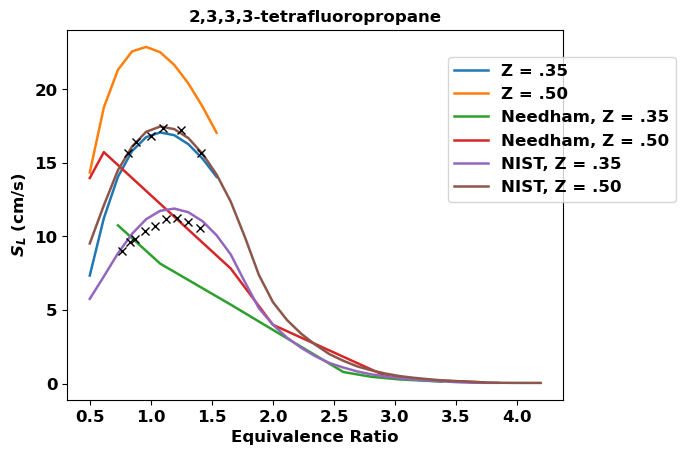

In [8]:
#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.plot(tetra_phis_35_percent[:10], tetra_speeds_35_percent[:10], '-', label='Z = .35')
ax1.plot(tetra_phis_50_percent[:10], tetra_speeds_50_percent[:10], '-', label='Z = .50')
ax1.plot(needham_phis_35, needham_speeds_35, '-', label='Needham, Z = .35')
ax1.plot(needham_phis_50, needham_speeds_50, '-', label='Needham, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '-', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'x', c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', c='black')



plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.title('2,3,3,3-tetrafluoropropane', fontsize = 12, fontweight='bold')
ax1.legend(bbox_to_anchor=(0.75, 0.95))


#flame speeds are way too fast for 2,3,3,3-tetrafluoropropene

# Recalculating Fluorine_lib (RMG model, no Needham seed)

In [37]:
#Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/

csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_39/') if '.csv' in x]
phis_39_Needham_core = []
speeds_39_Needham_core = []
for file in csv_files: 
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_39/{file}')
    velocity = df['velocity'][0]
    phis_39_Needham_core.append(phi)
    speeds_39_Needham_core.append(velocity*100)
    
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_50/') if '.csv' in x]
phis_50_Needham_core = []
speeds_50_Needham_core = []
for file in csv_files: 
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_50/{file}')
    velocity = df['velocity'][0]
    phis_50_Needham_core.append(phi)
    speeds_50_Needham_core.append(velocity*100)

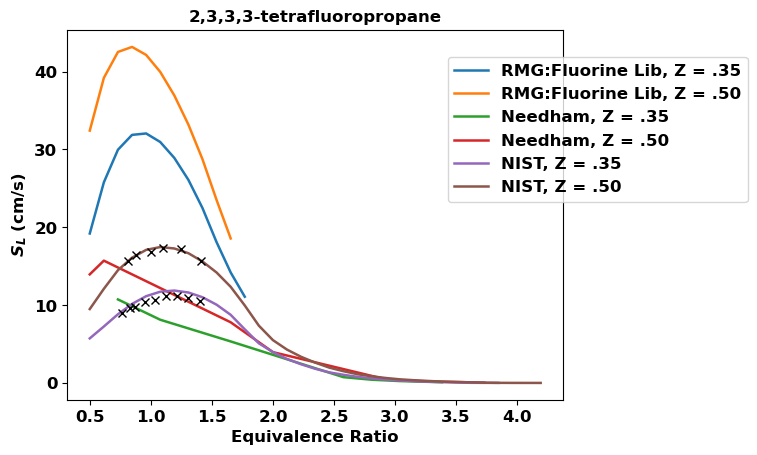

In [41]:
#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.plot(phis_39_Needham_core , speeds_39_Needham_core, '-', label='RMG:Fluorine Lib, Z = .35')
ax1.plot(phis_50_Needham_core , speeds_50_Needham_core, '-', label='RMG:Fluorine Lib, Z = .50')

ax1.plot(needham_phis_35, needham_speeds_35, '-', label='Needham, Z = .35')
ax1.plot(needham_phis_50, needham_speeds_50, '-', label='Needham, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '-', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'x', c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', c='black')



plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.title('2,3,3,3-tetrafluoropropane', fontsize = 12, fontweight='bold')
ax1.legend(bbox_to_anchor=(0.75, 0.95))

# Needham seeds

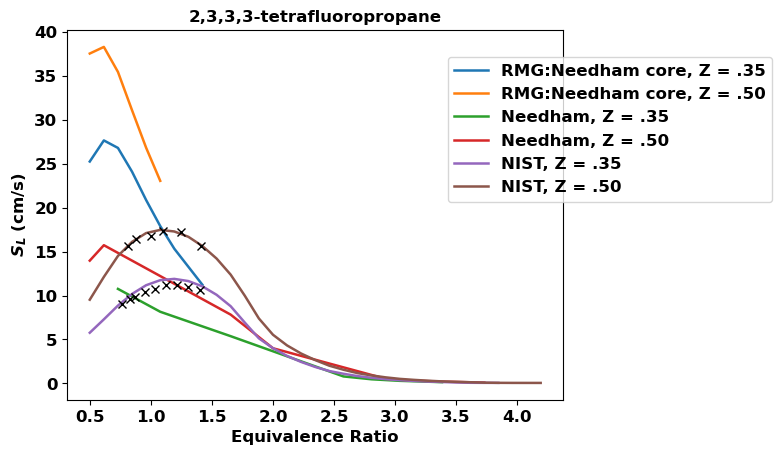

In [36]:
#Advanced_Kinetics_Class/project/models/RMG/Needham_core
#this has the Needham mech as a core 

csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Needham_core/data_39/') if '.csv' in x]
phis_39_Needham_core = []
speeds_39_Needham_core = []
for file in csv_files: 
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Needham_core/data_39/{file}')
    velocity = df['velocity'][0]
    phis_39_Needham_core.append(phi)
    speeds_39_Needham_core.append(velocity*100)
    
    
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Needham_core/data_50/') if '.csv' in x]
phis_50_Needham_core = []
speeds_50_Needham_core = []
for file in csv_files: 
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Needham_core/data_50/{file}')
    velocity = df['velocity'][0]
    phis_50_Needham_core.append(phi)
    speeds_50_Needham_core.append(velocity*100)

#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.plot(phis_39_Needham_core , speeds_39_Needham_core, '-', label='RMG:Needham core, Z = .35')
ax1.plot(phis_50_Needham_core , speeds_50_Needham_core, '-', label='RMG:Needham core, Z = .50')

#ax1.plot(tetra_phis_35_percent, tetra_speeds_35_percent, '-', label='RMG original model, Z = .35')
#ax1.plot(tetra_phis_50_percent[:10], tetra_speeds_50_percent[:10], '-', label='Z = .50')
ax1.plot(needham_phis_35, needham_speeds_35, '-', label='Needham, Z = .35')
ax1.plot(needham_phis_50, needham_speeds_50, '-', label='Needham, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '-', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'x', c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', c='black')



plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.title('2,3,3,3-tetrafluoropropane', fontsize = 12, fontweight='bold')
ax1.legend(bbox_to_anchor=(0.75, 0.95))



In [ ]:
Y_C5H5O(1_3)
Y_C5H5O(2_4)